# Basic Libraries

In [1]:
%matplotlib inline
import random
import math
import numpy as np
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

provider = IBMQ.get_provider(hub='ibm-q-education', group = 'rutgers-uni-Schn', project= 'vqe-research')
machine = provider.get_backend('ibmq_casablanca')
# from qiskit.test.mock import FakeLondon
# machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
config = machine.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_casablanca, and is on version 1.0.1. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'u1', 'u2', 'u3', 'cx'].


## Gate Insertion

In [3]:
from GateInsertion_funcs import splitter, PiReader, GateInsertion, u3PairAdder, cXPairAdder, GateInserter

## Pulse Stretching

In [4]:
from newPulseFuncs import instruc_sorter, get_closest_multiple_of_16, stretch_sub_sched, stretcher, scheduler

## Generic Result Functions

In [5]:
from Result_Funcs_Two_Qubit import fullCountSetGenerator, marginalizeCounts, addDicts, runExperiments

## VQE Result Functions

In [6]:

# Expectation Value/Running Functions
from ResultVQE_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, evaluator

# VQE Functions

In [7]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier

In [8]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

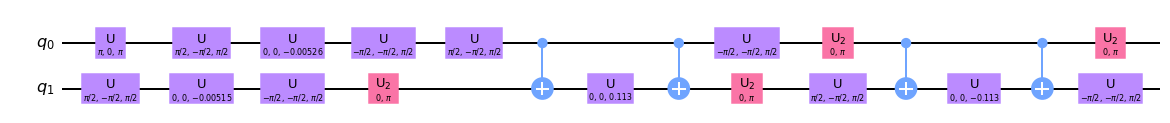

In [9]:
param = [ 0.0026304,-0.0025734,  -0.11250428]# on casa blanca noisemodel Nov 17 [ 0.00263048 -0.0025734  -0.11250428]
circ = var_form.construct_circuit(param).decompose().decompose()
circ.draw(output = 'mpl')

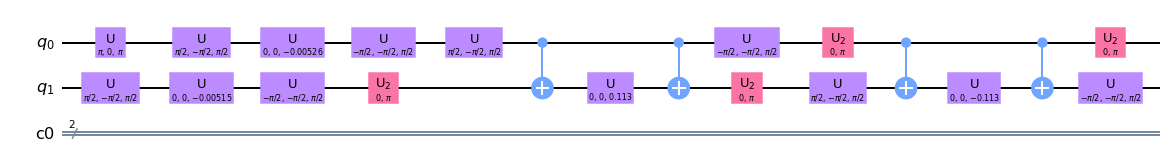

In [10]:
reg = ClassicalRegister(2)
circ.add_register(reg)
circ.draw(output = 'mpl')

In [28]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)

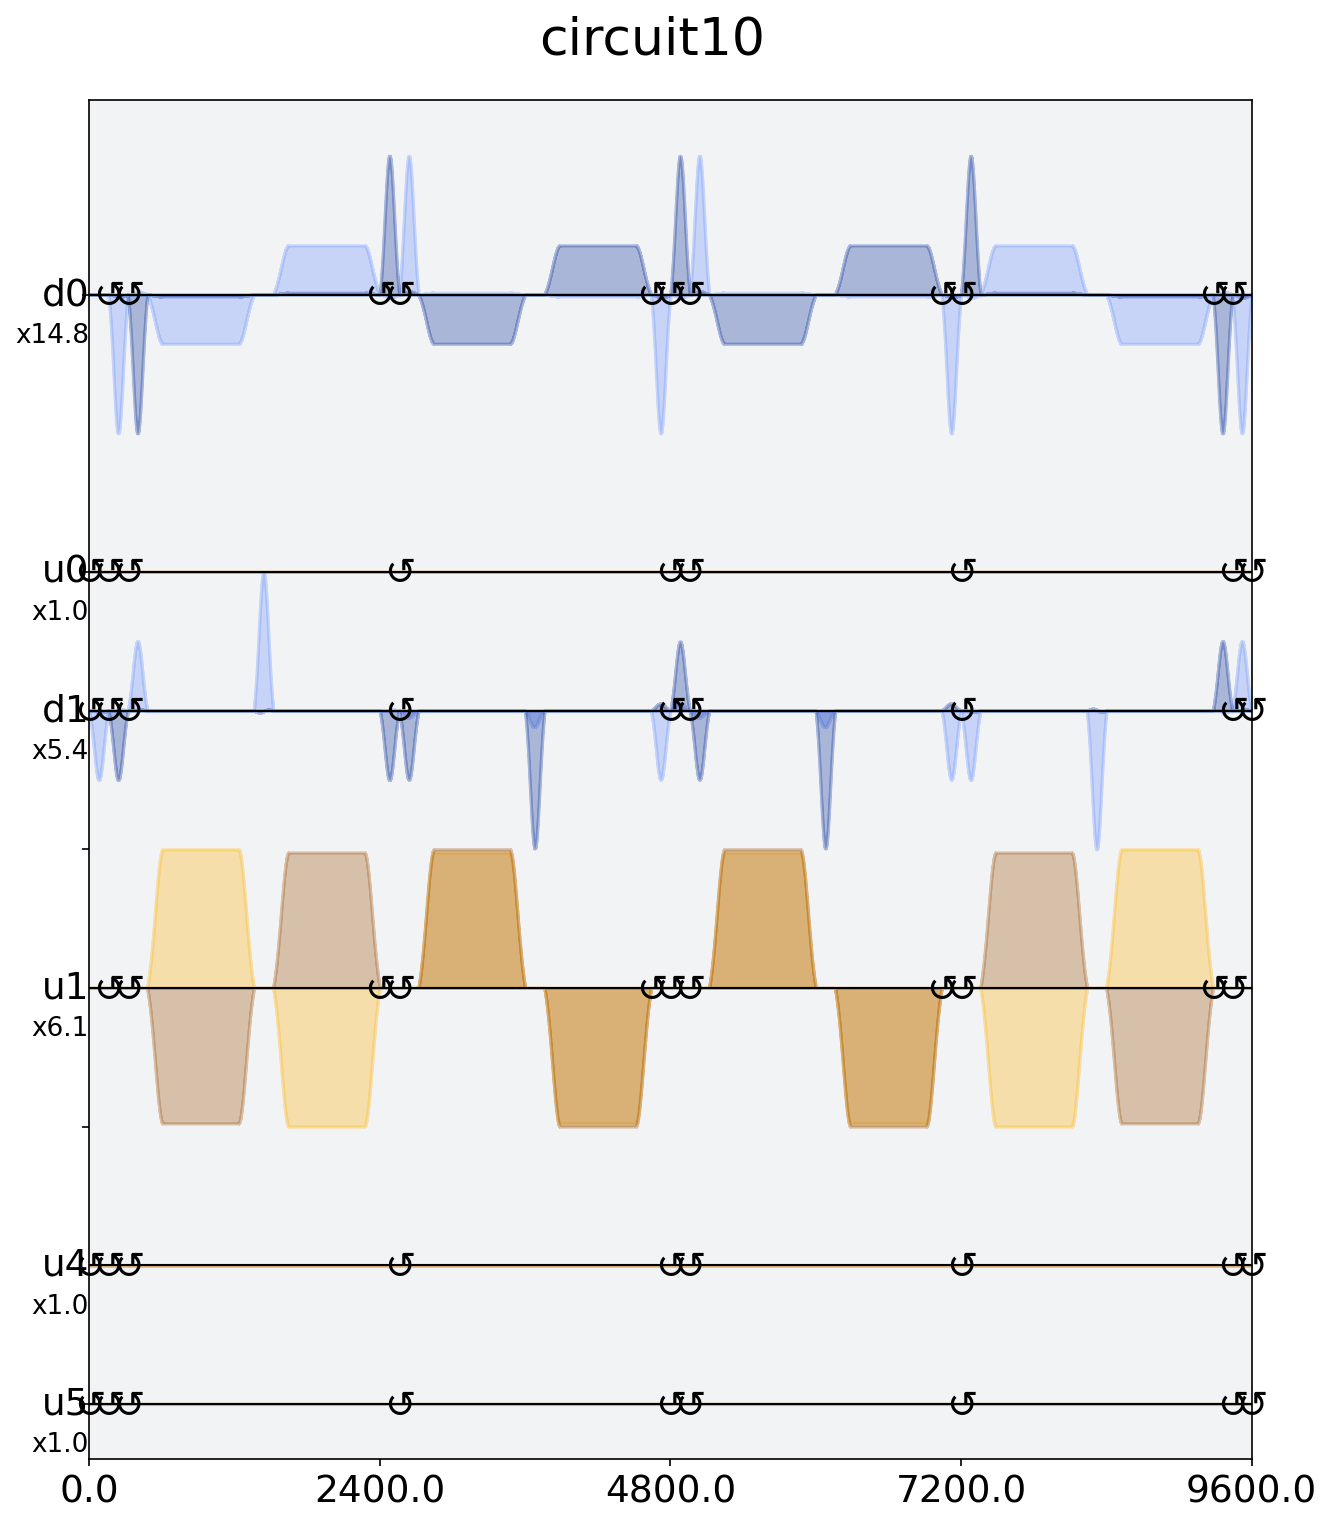

In [29]:
sched_circ.draw()

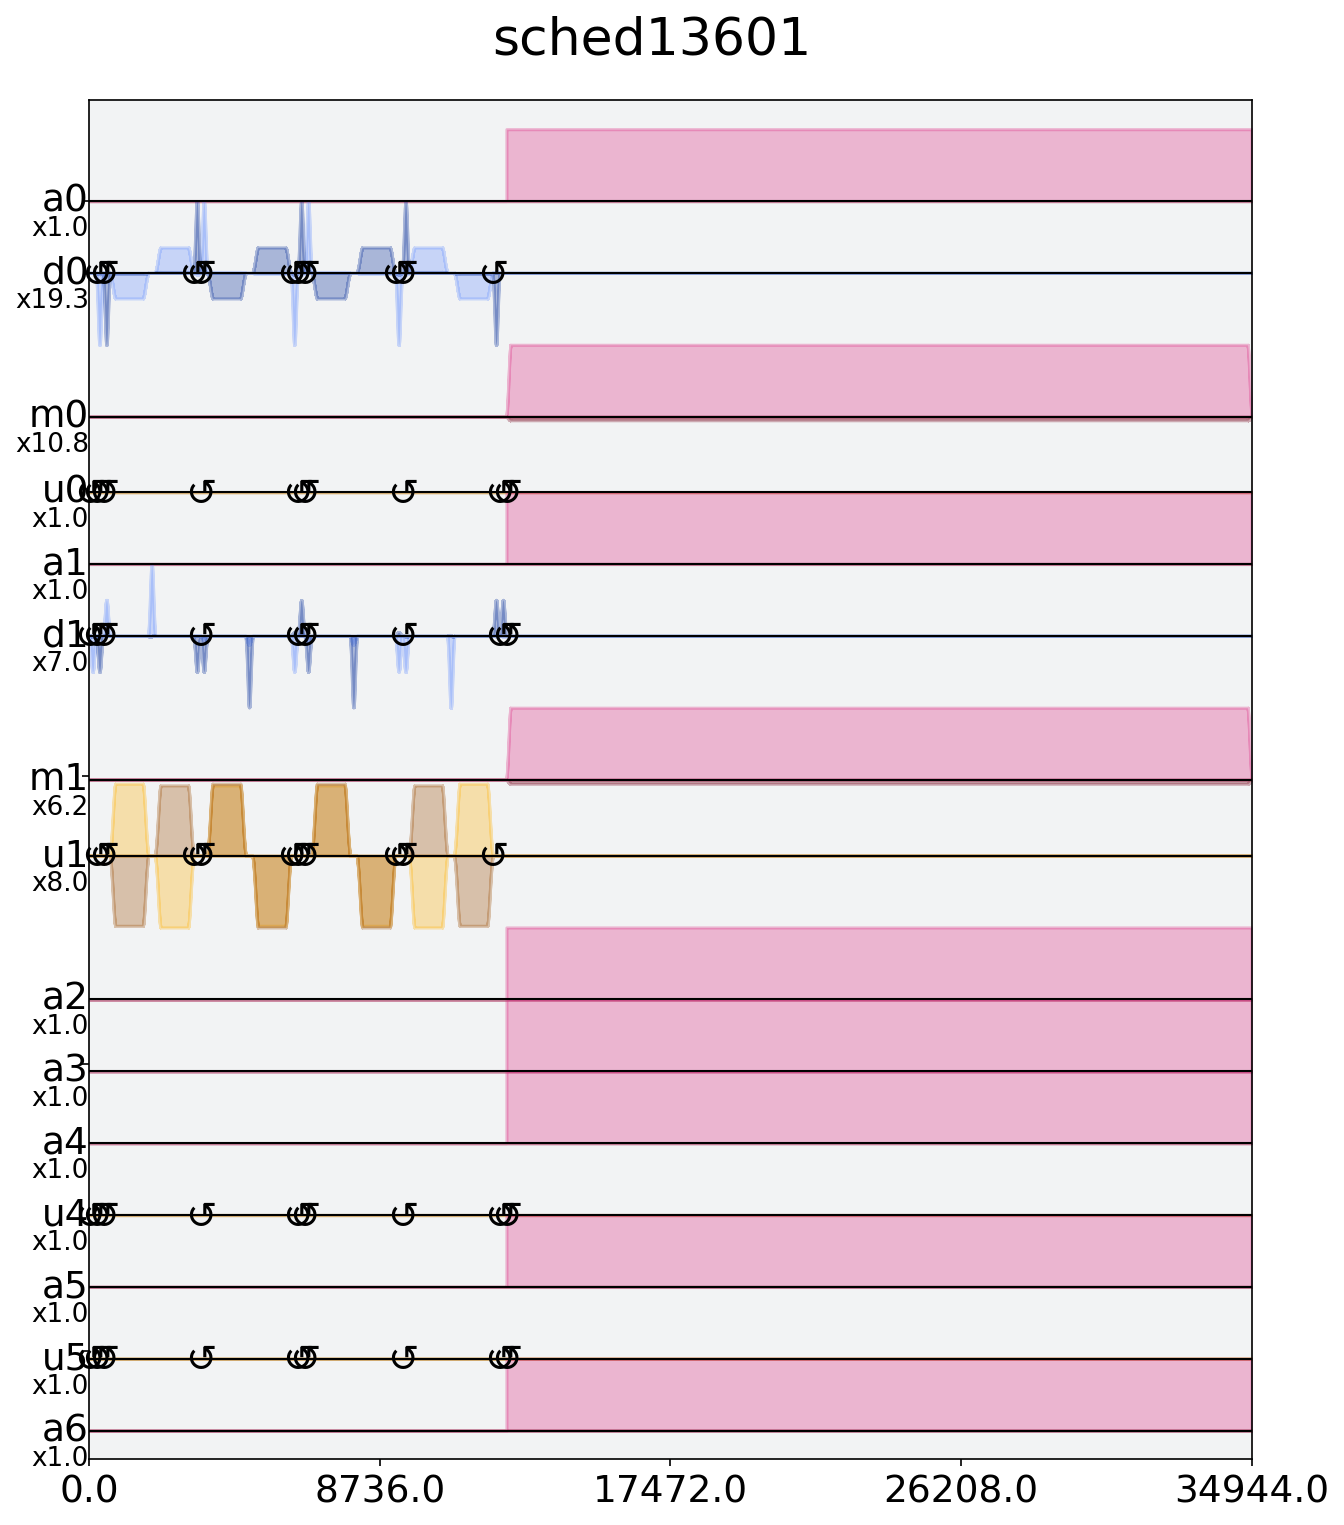

In [31]:
circuitss[3][1].draw()

## Stretching and Prepping

In [11]:
scales = [1, 1.2, 1.4, 1.6, 1.8, 2]

In [20]:
import numpy as np
circuitss = 0
def EnergyFinder(scales, pulse1gate0):
    '''
    Input: scales and a boolean (if stretch pulse ==1 , otherwise iusing gates == 0)
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    global machine
    backend = machine
    samples = 8192
    
  
        
    global circ
    circ_ =circ.copy()
    circuits = Hammifier(circ_, Hamiltonian)
    if (pulse1gate0 == 1):
        scaled_circuits = scheduler(scales, circuits, machine = machine)
    else:
        scaled_circuits = GateInserter(scales, circuits)
    global circuitss
    circuitss = scaled_circuits
    counts =  runExperiments(scaled_circuits, machine,samples)
    
    energies = []
    for i in range(len(counts)):
        expecVals =expecValForSamples(counts[i][0], counts[i][1], Hamiltonian, Hamiltonian_weights)  #zz, xx
        energy = np.mean(expecVals)
        energies.append(energy)
        
    return energies  
    

In [24]:
scales = [1 + (0.1*i) for i in range(10)]

In [25]:
scales

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9]

In [26]:
pulse_energies = EnergyFinder(scales, 1)

Job Status: job is queued

KeyboardInterrupt: 

In [18]:
pulse_energies

[-0.5045006413876687,
 -0.5192931218564187,
 -0.5147701726376688,
 -0.5205582585751688,
 -0.5174335027157937,
 -0.5182611394345438,
 -0.5168788152157938,
 -0.5187992253720439,
 -0.5231876531064188,
 -0.5164327702939188,
 -0.5218846745907938,
 -0.5139064031064188,
 -0.5115338445126687,
 -0.5226771550595437,
 -0.5166283269345437,
 -0.5155726628720437,
 -0.5131415105282937,
 -0.5065475163876688,
 -0.5092984929501688,
 -0.4968775945126688,
 -0.4979767156064188,
 -0.49692813162204386,
 -0.5054972234189188,
 -0.5060890202939188,
 -0.4991878972470438,
 -0.49917837576266877,
 -0.5017997136532938,
 -0.5026666570126688,
 -0.5095860906064188,
 -0.48817935232516885]